<a href="https://colab.research.google.com/github/jobthomas777/StockPathPredictor/blob/main/Monte_Carlo_Stimulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

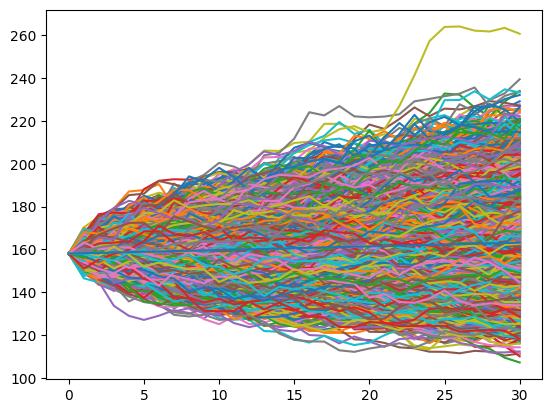

Prediction for future stock price: $163.13


<ipython-input-3-d181249d3b2e>:32: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('Prediction for future stock price: $%.2f' % simulation_data['mean'] .tail(1))


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

NUM_OF_SIMULATIONS = 10000


def stock_monte_carlo(S0, mu, sigma, N=30): #comment

    result = []

    # number of simulations - possible S(t) realizations (of the process)
    for _ in range(NUM_OF_SIMULATIONS):
        prices = [S0]
        for _ in range(N):
            # we simulate the change day by day (t=1)
            stock_price = prices[-1] * np.exp((mu - 0.5 * sigma ** 2) +
                                              sigma * np.random.normal())
            prices.append(stock_price)

        result.append(prices)

    simulation_data = pd.DataFrame(result)
    # the given columns will contain the time series for a given simulation
    simulation_data = simulation_data.T

    simulation_data['mean'] = simulation_data.mean(axis=1)

    plt.plot(simulation_data)
    plt.show()

    print('Prediction for future stock price: $%.2f' % simulation_data['mean'] .tail(1))


if __name__ == '__main__':
    stock_monte_carlo(158,  0.0011, 0.0197)
